# ĐỒ ÁN LẬP TRÌNH SONG SONG ỨNG DỤNG

## DANH SÁCH THÀNH VIÊN

20120510 - Nguyễn Hữu Anh Khoa

20120322 - Đặng Thiên Long

Link github: https://github.com/huukhoa2112/LTSSUD

## ĐỀ TÀI: ENHANCING IMAGE DOCUMENT

### 1. Giới thiệu tổng quan:

**Enhancing document image** là một bước trong công việc xử lý ảnh, là bước nền cơ bản hỗ trợ cho các chức năng nâng cao khác như scan hình ảnh, chuyển đổi văn bản trong ảnh thành dạng text, điều chỉnh lại góc chụp của bức ảnh,  tối ưu hóa hình ảnh của các tài liệu hoặc văn bản số để nâng cao chất lượng, độ rõ nét và khả năng đọc của chúng.

**Input:** một bức ảnh có góc chụp không trực diện với màn hình và background dư thừa.

**Output:** một bức ảnh có góc chụp trực diện với màn hình và loại bỏ background.

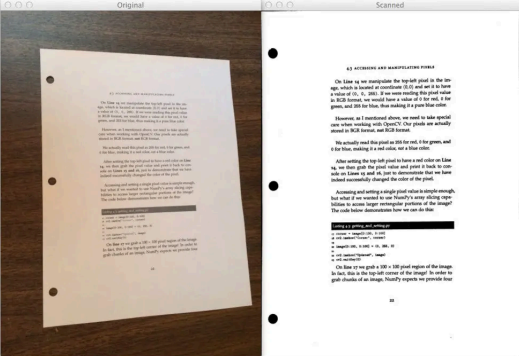

### 2. Ứng dụng của bài toán:

* Ứng dụng ở các trường học khi nộp bài tập, báo cáo online để các giáo viên dễ chấm bài và xem rõ hơn. Một số ứng dụng trên điện thoại: CamScanner, Microsoft Lens.
* Quảng cáo và marketing, tạo ra hình ảnh sạch sẽ thu hút khách hàng.
* Các web bán lẻ trực tuyến sử dụng công nghệ này giúp người mua dễ dàng nhận biết sản phẩm và tăng khả năng quyết định mua hàng.

### 3. Vì sao cần song song hóa?

Bài toán **Enhancing document image** cần được song song hóa là vì:

- Sự phức tạp của thuật toán ở các bước xử lí hình ảnh, các phép biến đổi hình học và loại bỏ background.
- Sự không đồng nhất giữa các bức ảnh do mỗi ảnh đều có cấu trúc và độ phức tạp khác nhau.
- Tăng tốc độ xử lí và tối ưu hóa GPU.

### 4. Ý tưởng chung 

Các bước thực hiện:

- Phát hiện biên cạnh.
- Xác định viền của đối tượng dựa trên các cạnh đã xác định.
- Đưa ảnh về đối diện màn hình.
- Điều chỉnh độ tương phản, độ sáng của bức ảnh.

#### 4.1 Phát hiện biên cạnh


* Phát hiện biên cạnh là bước tìm ra các biên thuộc các đối tượng trong ảnh, nhầm phân tách và biết được hình dạng (shape) các đối tượng đó.
* Có 2 thuật toán nổi tiếng cho bài toán này là Sobel edge detector và Canny edge detector.
* Trong bài toán này nhóm chọn sử dụng thuật toán Canny edge detector. Thuật toán gồm 4 giai đoạn nhỏ:
    
    1. Làm mịn hình ảnh (giảm nhiễu): tiến hành làm mờ và giảm nhiễu cho bức ảnh bằng Gaussian ([Công thức của Gaussian Filter](https://docs.opencv.org/2.4/doc/tutorials/imgproc/gausian_median_blur_bilateral_filter/gausian_median_blur_bilateral_filter.html#gaussian-filter)). Điều này giúp giảm các đỉnh và đáy không mong muốn trong đồ thị biểu diễn cạnh, giúp tạo ra kết quả cạnh chính xác hơn.

    **Công thức Gaussian Filter:**

  $$G_{0}(x, y) = A  e^{ \dfrac{ -(x - \mu_{x})^{2} }{ 2\sigma^{2}_{x} } +  \dfrac{ -(y - \mu_{y})^{2} }{ 2\sigma^{2}_{y} } }$$

  **Trong đó:** μ là giá trị trung bình (đỉnh) và σ biểu thị độ lệch chuẩn (cho mỗi biến x và y)
    
    2. Tính Gradient và hướng gradient: Sau khi làm mịn hình ảnh, gradient của hình ảnh được tính toán để xác định các pixel có độ dốc cao nhất. Sử dụng bộ lọc Sobel X và Sobel Y để lấy ra được đạo hàm theo chiều ngang (Gx) và dọc của bức ảnh (Gy). Từ đó ta sẽ tính được  gradient (độ lớn của sự biến đổi mức sáng ở vị trí pixel tương ứng với ảnh gốc) và hướng của từng pixel trong ảnh theo công thức sau. Trong đó hướng của cạnh được chia thành 4 hướng đại diện: ngang (0 độ), chéo bên phải (45 độ), dọc (90 độ), chéo bên trái (135 độ). 
  $$Edge\_Gradient(G) = \sqrt{G^2_x + G^2_y}$$

  $$Angle (Θ) = tan^{-1} (\frac{G_y}{G_x})$$
  
    3. Tính non-max suppression (loại bỏ pixel không cần thiết): Mục đích lọc bỏ các pixel không phải là cực đại cục bộ. Ta sử dụng 1 filter 3x3 chạy lần lượt qua các pixel của ảnh sau khi đã gradient. Trong các lần chạy, ta xét độ lớn của pixel hiện tại có phải là cực đại so với 2 hàng xóm (dựa trên hướng gradient)  hay không. Nếu là cực đại thì ghi nhận lại pixel đó, ngược lại set độ lớn của pixel đó bằng 0.

    <div style="text-align:center">
      <img src="https://docs.opencv.org/4.x/nms.jpg" alt="Image" />
    </div>
   
  
    4. Lọc ngưỡng: ở đây ta có 2 giá trị được gọi là maxVal và minVal. Nếu pixel hiện tại có giá trị lớn hơn maxVal thì pixel đó là cạnh, nhỏ hơn minVal thì bị loại bỏ. Còn các pixel nằm giữa maxVal và minVal, ta sẽ xét nó nằm gần với bên nào để quyết định có giữ lại nó hay không. 

    <div style="text-align:center">
      <img src="https://docs.opencv.org/4.x/hysteresis.jpg" alt="Image" />
    </div>
    


**Nguồn:** https://minhng.info/tutorials/xu-ly-anh-opencv-hien-thuc-canny-edge.html

#### 4.2 Xác định viền của đối tượng dựa trên các cạnh đã xác định

Mục tiêu của bước này này là lấy ra được viền của ảnh đã lấy biên, các pixel của ảnh lúc này chỉ là 0 hoặc 255. Sử dụng hàm OpenCV cho bước này vì nhóm không tìm được thuật toán tham khảo để có thể thực hiện cài đặt tuần tự và đưa ra đánh giá. Giá trị trả ra của hàm là toàn bộ các viền có trong ảnh, các viền ở đây là tập hợp các pixel có giá trị 255 và liền kề nhau.

#### 4.3 Đưa ảnh về đối diện màn hình

* Lúc này, ta sẽ lấy các pixel nằm bên trong viền đã được nhận diện ở bước trước đó, thực hiện việc map các điểm ảnh này sang một không gian tọa độ mới (đối diện màn hình).

* Các hướng tiếp cận cho bước có điểm chung là đều được thực hiện bằng cách nhân ma trận trên một hệ tọa độ đồng nhất ([Homogeneous coordinates](https://en.wikipedia.org/wiki/Homogeneous_coordinates)):

    * Sử dụng các **phép xoay ảnh**: Xoay bức ảnh quanh một điểm theo một góc xác định nào đó, vẫn giữ nguyên các tính chất của ảnh (các góc của ảnh vẫn giữ nguyên).
    * Sử dụng **phép biến đổi affine**: Cần xác định ba điểm trên ảnh gốc và vị trí của chúng trên ảnh kết quả. Biến đổi affine giúp tạo ra nhiều tư thế, biến thể khác nhau của vật thể. Các biến thể này sẽ được bảo toàn tính song song, tỉ lệ khoảng cách của vật thể và các đường thẳng trong ảnh.
    * Sử dụng **biến đổi phối cảnh** (Perspective transform hoặc Homography transform): Đây là một phép biến đổi đặc biệt khi mà ảnh kết quả không được đảm bảo về góc, độ dài, tính song song so với ảnh gốc ngoại trừ bảo toàn đường thẳng.


**Phép biến đổi Homography**

* Đối với bài toán này, hình dạng của văn bản trong ảnh đầu vào đa dạng và không phải luôn là chữ nhật $→$ **biến đổi phối cảnh** sẽ là giải pháp tốt nhất để có thể đưa văn bản về đối diện màn hình.

* Các bước thực hiện phép biến đổi Homography:
    
    1. Xác định 4 điểm góc của văn bản trong ảnh đầu vào (source points) và xem nó là 4 đỉnh của ảnh đầu ra (target points).
    
    2. Dựa trên 4 điểm đã chọn, tính chiều dài và rộng cho ảnh đầu ra $→$ xác định được tọa độ 4 đỉnh trong không gian mới và kích thước của ảnh output.
    
    3. Khi đã có được source và target points thì ta có thể dễ dàng tính được ma trận biến đổi **H** (3x3).
    
    4. Thực hiện việc chuyển đổi tọa độ cho từng điểm ảnh bằng công thức sau:
    $$dst(x,y) = src(\frac{H_{0,0}x + H_{0,1}y + H_{0,2}}{H_{2,0}x + H_{2,1}y + H_{2,2}},\frac{H_{1,0}x + H_{1,1}y + H_{1,2}}{H_{2,0}x + H_{2,1}y + H_{2,2}})$$ 


<div style="text-align:center">
    <img src="https://docs.opencv.org/4.x/homography_perspective_correction.jpg" alt="Image" />
</div>

**Nguồn**: [OpenCV, Basic concepts of the homography explained with code.](https://docs.opencv.org/4.x/d9/dab/tutorial_homography.html)

##### 4.4 Điều chỉnh độ sáng, độ tương phản của ảnh

* Điều chỉnh độ sáng, độ tương phản của bức ảnh sau khi đã đưa ảnh tài liệu về chính diện màn hình.
* Trong GIMP, mức độ tương phản đi từ -127 đến +127


* Bước đầu tiên là tính toán hệ số hiệu chỉnh độ tương phản được đưa ra bởi công thức sau:

>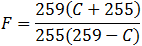

* Để thuật toán hoạt động chính xác, giá trị của hệ số hiệu chỉnh độ tương phản ( F ) cần được lưu trữ dưới dạng số dấu phẩy động chứ không phải số nguyên. Giá trị C trong công thức biểu thị mức độ tương phản mong muốn.

* Bước tiếp theo là tự thực hiện điều chỉnh độ tương phản thực tế. Công thức sau đây cho thấy sự điều chỉnh độ tương phản được thực hiện đối với thành phần màu đỏ của một màu:

>image.png

* Ta sẽ điều chỉnh công thức lại để phù hợp:

>f = 131 * (tương phản + 127) / (127 * (131-tương phản))

>new_image = f * (old_image - 127) + 127 = f * (old_image) + 127 * (1-f)

* Tiếp theo ta sẽ tìm ra độ sáng

* Đầu tiên, hãy tính toán giá trị hiệu chỉnh gamma để sử dụng cho việc điều chỉnh âm trung (nếu muốn). Phần sau mô phỏng gần đúng kỹ thuật của Photoshop, áp dụng gamma 9.99-1.00 cho các giá trị midtone 0-128 và 1.00-0.01 cho 128-255.

**Apply gamma correction:**

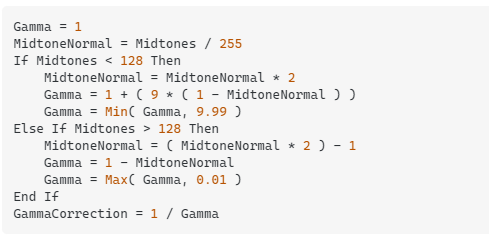


* Sau đó, đối với mỗi giá trị kênh R, G, B (0-255) cho mỗi pixel, hãy thực hiện theo thứ tự sau.

**Apply the input levels:**

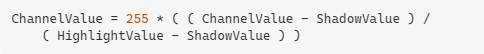

**Apply the midtones:**

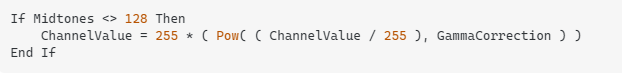

**Apply the output levels:**

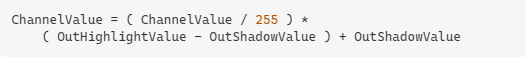

**Where:**

* Tất cả các giá trị kênh và thông số điều chỉnh là số nguyên, bao gồm 0-255
* Shadow / Midtone / HighlightValue là các giá trị điều chỉnh đầu vào (mặc định 0, 128, 255)
* OutShadow / HighlightValue là các giá trị điều chỉnh đầu ra (mặc định là 0, 255)
* Ta sẽ tối ưu hóa mọi thứ và đảm bảo các giá trị được giữ trong giới hạn (chẳng hạn như 0-255 cho mỗi kênh)
* Để mô phỏng Photoshop chính xác hơn, bạn có thể sử dụng đường cong nội suy phi tuyến tính nếu Midtones <128. Theo mặc định, Photoshop cũng cắt bỏ 0,1% giá trị tối nhất và sáng nhất.





















### 5. Cài đặt tuần tự: